In [1]:
import torch
from torch import nn
from torch.utils.data import TensorDataset,DataLoader
from deeplearn_tools import *

In [2]:
n_train,n_test,num_inputs,batch_size = 20,100,200,5
true_w = torch.ones((num_inputs,1))*0.01
true_b = 0.05
train_data = synthetic_data(true_w,true_b,n_train)
test_data = synthetic_data(true_w,true_b,n_test)

train_dataset = TensorDataset(*train_data)
test_dataset = TensorDataset(*test_data)

train_iter = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_iter = DataLoader(test_dataset,batch_size=batch_size,shuffle=False)

In [3]:
def init_params():
    w = torch.normal(0,1,size=(num_inputs,1),requires_grad=True)
    b = torch.zeros(size=(1,),requires_grad=True)
    return w,b
w,b = init_params()

In [4]:
def L2_penalty(w):
    return w.pow(2).sum()/2

In [5]:
def linear_reg(x,w=w,b=b):
    y = torch.matmul(x,w)+b
    return y

In [6]:
def loss(y_hat,y,lamda,w=w):
    l = (y_hat - y).pow(2).sum()/len(y)+ lamda * L2_penalty(w)
    return l

In [7]:
def evaluate_loss(net,data_iter,loss,lamda):
    metric = Accumulator(2)
    for x,y in data_iter:
        y_hat = net(x)
        l = loss(y_hat,y.reshape(y_hat.shape),lamda)
        metric.add(l,l.numel())
    return metric[0]/metric[1]

In [8]:
Optimizer = torch.optim.SGD([w,b],lr=0.01)

In [9]:
net = linear_reg

In [10]:
def train(num_epochs,train_iter,test_iter,net,loss,Optimizer,lamda):
    anim = Animator(xlabel="num_epochs",xlim=[1,num_epochs],legend=["train_loss","test_loss"],yscale="log")
    for epoch in range(num_epochs):
        for x,y in train_iter:
            y_hat = net(x)
            l = loss(y_hat,y.reshape(y_hat.shape),lamda)
            Optimizer.zero_grad()
            l.sum().backward()
            Optimizer.step()
        with torch.no_grad():
            train_loss = evaluate_loss(net,train_iter,loss,lamda)
            test_loss = evaluate_loss(net,test_iter,loss,lamda)
        anim.add(epoch+1,[train_loss,test_loss])
    print('w的L2范数是：',torch.norm(w).item())
        

w的L2范数是： 12.311739921569824


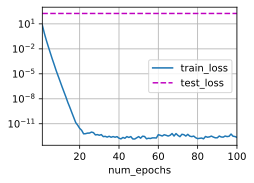

In [11]:
num_epochs = 100
lamda = 0
train(num_epochs,train_iter,test_iter,net,loss,Optimizer,lamda)

w的L2范数是： 0.039532650262117386


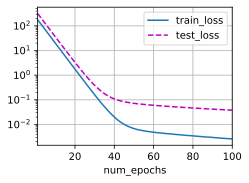

In [13]:
num_epochs = 100
lamda = 3
train(num_epochs,train_iter,test_iter,net,loss,Optimizer,lamda)